In [1]:
!pip install pydotplus

In [2]:
import pandas as pd
import numpy as np

## Question 1

### Use Random Forest to prepare a model on fraud data 
### treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [3]:
fraud = pd.read_csv("/Users/apple/Downloads/Fraud_check.csv")

In [4]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [6]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [7]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [9]:
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [10]:
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [12]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [13]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_
model.n_outputs_
model.oob_score_

0.7416666666666667

In [14]:
prediction = model.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,prediction)

In [16]:
accuracy

0.7666666666666667

In [17]:
np.mean(prediction == y_test)

0.7666666666666667

In [18]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,prediction)

In [19]:
confusion

array([[89,  6],
       [22,  3]])

### Using Bagging Technique

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

model = BaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv,n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.738 (0.038)


>10 0.854 (0.045)
>50 0.876 (0.035)
>100 0.884 (0.036)
>500 0.887 (0.037)
>1000 0.885 (0.036)


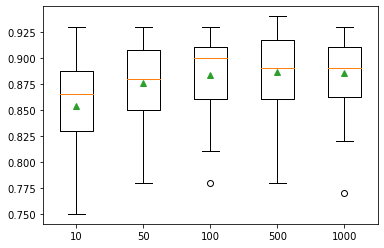

In [21]:
from sklearn.datasets import make_classification
from matplotlib import pyplot

def get_dataset():
    x_train, y_train = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
    return x_train, y_train
 
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 500, 1000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models
 
def evaluate_model(model, x_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
x_train, y_train = get_dataset()
models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Using XGBoost Technique

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [23]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [24]:
model=XGBClassifier()
model.fit(x_train2,y_train2)

[12:21:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
x_test2.shape,x_train2.shape

((120, 5), (480, 5))

In [26]:
y_pred=model.predict(x_test2)

In [27]:
predictions=[round(value) for value in y_pred]

In [28]:
accuracy=accuracy_score(y_test2,y_pred)
print("Accuracy:%.2f%%"%(accuracy*100))

Accuracy:68.33%


# Question 2

### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
### Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [29]:
company=pd.read_csv("/Users/apple/Downloads/Company_Data.csv")

In [30]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [31]:
le=preprocessing.LabelEncoder()
for column_name in company.columns:
    if company[column_name].dtype == object:
        company[column_name] = le.fit_transform(company[column_name])
    else:
        pass

In [32]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [33]:
company['Sales'].max()

16.27

In [34]:
company["Sales_Report"] = pd.cut(company["Sales"], bins = [0.0,8.5,16.27], labels = ["High", "Low"])

In [35]:
company= pd.get_dummies(company,columns = ["Sales_Report"],drop_first=True)

In [36]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Report_Low
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [37]:
x2=company.iloc[:,1:11]
y2=company.iloc[:,11]

In [38]:
xtrain, xtest,ytrain,ytest = train_test_split(x2,y2, test_size=0.2,random_state=40)

In [39]:
training_scores_encoded = le.fit_transform(ytrain)

In [40]:
model2 = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model2.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [41]:
model2.estimators_
model2.classes_
model2.n_features_
model2.n_classes_
model2.n_outputs_
model2.oob_score_

0.76875

In [42]:
prediction = model2.predict(xtest)

In [43]:
accuracy = accuracy_score(ytest,prediction)
accuracy

0.8375

In [44]:
np.mean(prediction == ytest)

0.8375

In [45]:
confusion = confusion_matrix(ytest,prediction)

In [46]:
confusion

array([[48,  7],
       [ 6, 19]])

## Using Bagging Technique

In [47]:
model = BaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, xtrain, ytrain, scoring='accuracy', cv=cv,n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.769 (0.070)


>10 0.861 (0.034)
>50 0.885 (0.035)
>100 0.884 (0.038)
>500 0.883 (0.040)
>1000 0.886 (0.036)


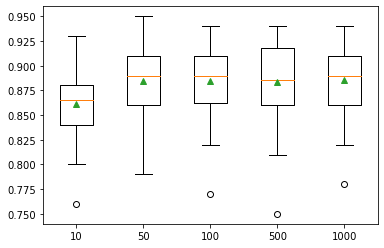

In [48]:
def get_dataset():
    xtrain, ytrain = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
    return xtrain, ytrain
 
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 500, 1000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models
 
def evaluate_model(model, xtrain, ytrain):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
xtrain, ytrain = get_dataset()
models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, xtrain, ytrain)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Using XGBoost Technique

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [52]:
xtrain, xtest,ytrain,ytest = train_test_split(x2,y2, test_size=0.2,random_state=40)

In [53]:
model=XGBClassifier()
model.fit(xtrain,ytrain)

[12:23:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
y_pred=model.predict(xtest)

In [55]:
predictions=[round(value) for value in y_pred]

In [56]:
accuracy=accuracy_score(ytest,y_pred)
print("Accuracy:%.2f%%"%(accuracy*100))

Accuracy:86.25%
